#INTERPOLAÇÃO E AJUSTE DE CURVAS#

##INTERPOLAÇÃO##

In [76]:
x = [0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0  8.0 9.0 10.0];
y = [0.0 0.5 4.3 7.0 8.0 6.0 6.9 10.0 9.0 9.5 8.2 ];

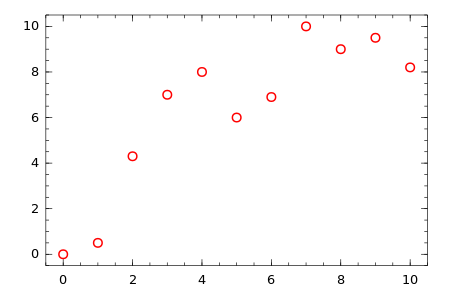

In [77]:
using Winston

Winston.plot(x,y,"or")

Melhorando o gráfico

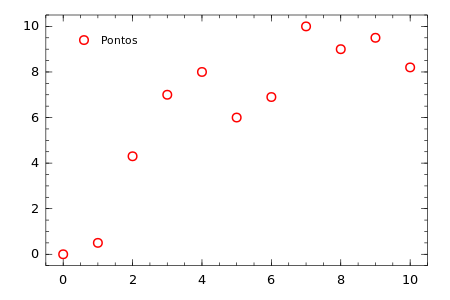

In [78]:
Winston.plot(x,y,"or")
legend(["Pontos"])

###FUNÇÃO INTERPOLATIONS ###

Se não tiver instalado use: Pkg.add("Interpolations")

In [109]:
using Interpolations

In [128]:
xx = vec(x); yy = vec(y);

In [130]:
# CUIDADO: VEJA QUE NO COMANDO interpolate((xx,)... TEMOS XX E VIRGULA

yinterp1= interpolate((xx,), yy, Gridded(Linear())); 

In [133]:
typeof(yinterp1)

Interpolations.GriddedInterpolation{Float64,1,Float64,Interpolations.Gridded{Interpolations.Linear},Tuple{Array{Float64,1}},0}

In [158]:
yinterp1[x1]

11-element Array{Float64,1}:
  0.0
  0.5
  4.3
  7.0
  8.0
  6.0
  6.9
 10.0
  9.0
  9.5
  8.2

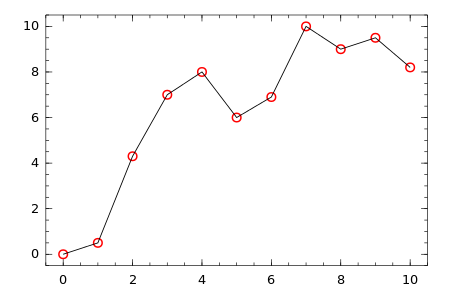

In [154]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10, map(x1->yinterp1[x1],0:0.1:10))

In [140]:
yintC = interpolate((xx,), yy, Gridded(Constant())); 

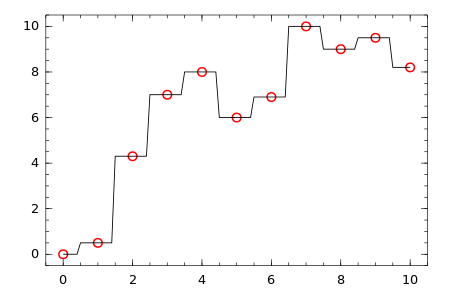

In [155]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10, map(x1->yintC[x1],0:0.1:10) )

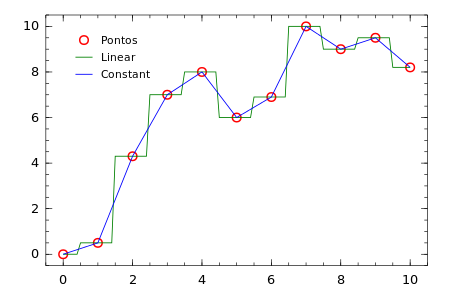

In [146]:
using Winston

Winston.plot(
x,y,"or", 
0:0.1:10, map(x1->yintC[x1],0:0.1:10),"g",
0:0.1:10, map(x1->yinterp1[x1],0:0.1:10),"b"
)

legend(["Pontos"; "Linear";"Constant"])

** Função Grid **

In [12]:
using Grid

In [99]:
x = [0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0  8.0 9.0 10.0];
y = [0.0 0.5 4.3 7.0 8.0 6.0 6.9 10.0 9.0 9.5 8.2 ];

x1 = 0.0:10.0

yint_G_Q = CoordInterpGrid(x1, vec(y), BCnil, InterpQuadratic); 

In [100]:
typeof(yint_G_Q)

Grid.CoordInterpGrid{Float64,1,Grid.BCnil,Grid.InterpQuadratic,Tuple{FloatRange{Float64}}}

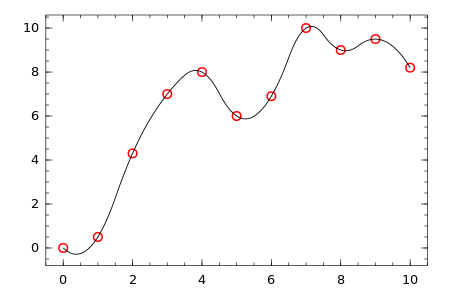

In [15]:
using Winston

Winston.plot(x1,y,"or", 0:0.1:10, map(x->yint_G_Q[x],0:0.1:10) )

In [16]:
yint_G_L = CoordInterpGrid(x1,vec(y), BCnil, InterpLinear);

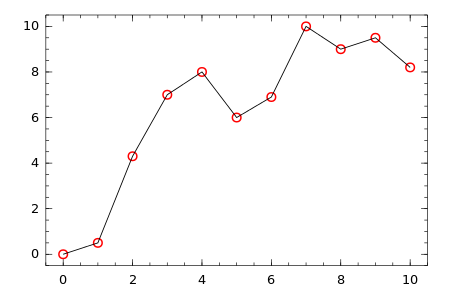

In [17]:
using Winston

Winston.plot(x1,y,"or", 0:0.1:10, map(x->yint_G_L[x],0:0.1:10) )

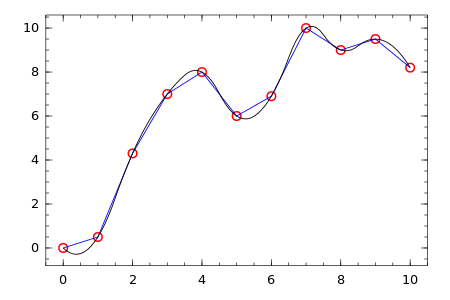

In [18]:
using Winston

Winston.plot(
x1,y,"or", 
0:0.1:10, map(x->yint_G_L[x],0:0.1:10),"b",
0:0.1:10, map(x->yint_G_Q[x],0:0.1:10),"k"
)

###FUNÇÃO NUMERICALMATH###

Se não estiver instalado, use:Pkg.clone("https://github.com/hwborchers/NumericalMath.jl")

interp1d(xs, ys, x) -- Interpolation of data points with methods :constant, :nearest, :linear, :spline, :cubic

In [19]:
using NumericalMath 

In [20]:
# NumericalMath só funciona com vetores de uma dimensão (Array{Float64,1}) 
# e os vetores x e y são do tipo Array{Float64,2}. 
# Logo, deve ser convertido para um vetor de uma dimensão.

xx = vec(x); yy = vec(y);

In [21]:
# Testando interpolação cubica para valor 2.3 

interp1d(xx,yy,2.3,method=:cubic)

5.255321746361746

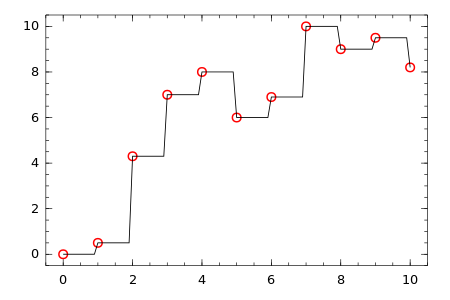

In [22]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10,map(x->interp1d(xx,yy,x,method=:constant),0:0.1:10) )

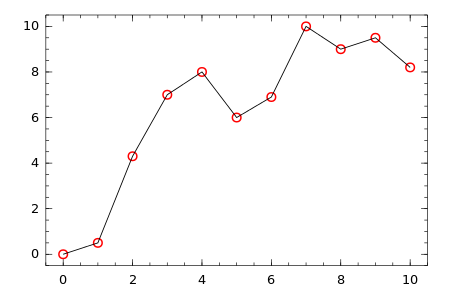

In [23]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10,map(x->interp1d(xx,yy,x,method=:linear),0:0.1:10) )

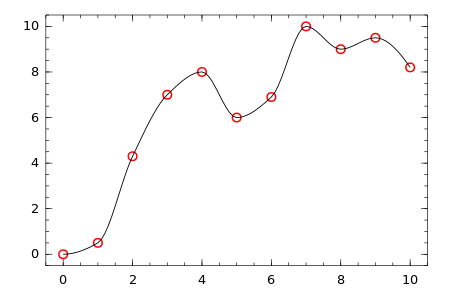

In [24]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10,map(x->interp1d(xx,yy,x,method=:cubic),0:0.1:10) )

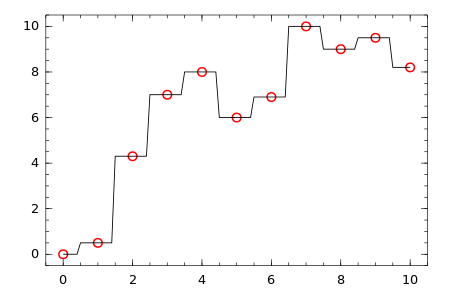

In [25]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10,map(x->interp1d(xx,yy,x,method=:nearest),0:0.1:10) )

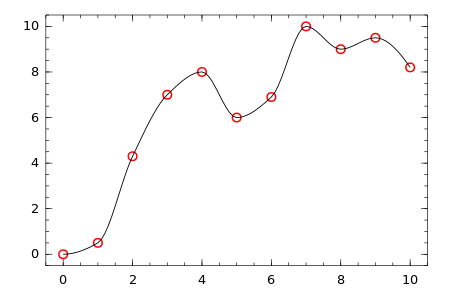

In [26]:
using Winston

Winston.plot(x,y,"or", 0:0.1:10,map(x->pchip(xx,yy,x),0:0.1:10) )

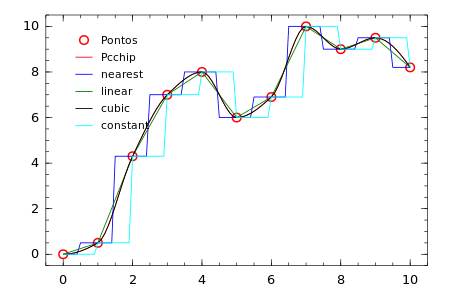

In [147]:
using Winston

Winston.plot(
x,y,"or", 
0:0.1:10,map(x->pchip(xx,yy,x),0:0.1:10),"r",
0:0.1:10,map(x->interp1d(xx,yy,x,method=:nearest),0:0.1:10),"b",
0:0.1:10,map(x->interp1d(xx,yy,x,method=:linear),0:0.1:10),"g",
0:0.1:10,map(x->interp1d(xx,yy,x,method=:cubic),0:0.1:10),"k",
0:0.1:10,map(x->interp1d(xx,yy,x,method=:constant),0:0.1:10),"c"
)
legend(["Pontos";"Pcchip"; "nearest";"linear"; "cubic";"constant"])

OPICIONAL

##AJUSTE DE CURVAS##

### LINEAR SIMPLES ###

In [28]:
using DataFrames

In [29]:
tabela_dados_reta = DataFrames.readtable("dados_reta.csv")

,x,y
1,0.0,-0.183440428023042
2,0.2,-0.131101157495126
3,0.4,0.0268875670852843
4,0.8,0.110532679260319
5,1.0,0.253944632998395
6,1.2,0.257190123748649
7,1.4,0.531888837111346
8,1.6,0.579048247883555
9,2.0,0.935180993484717
10,2.2,0.916600344376623


In [30]:
# atraibuíndo às variáveis "x" e "y" os valores das colunas da tabela_dados_reta

x = Array(tabela_dados_reta[1]); 
y = Array(tabela_dados_reta[2]);

In [31]:
# DADOS PARA USO DIRETO CASO NÃO TENHA O ARQUIVO ".CSV" . É SO RETIRAR O # PARA USAR. 

# x = [0.0,0.2,0.4,0.8,1.0,1.2,1.4,1.6,2.0,2.2,2.6,2.8,3.0,3.4];
# y = [-0.183440428023042,-0.131101157495126,0.0268875670852843,0.110532679260319,0.253944632998395,0.257190123748649,0.531888837111346,0.579048247883555,0.935180993484717,0.916600344376623,1.13328608090532,1.26893326843583,1.10202945535186,1.13391615491257];

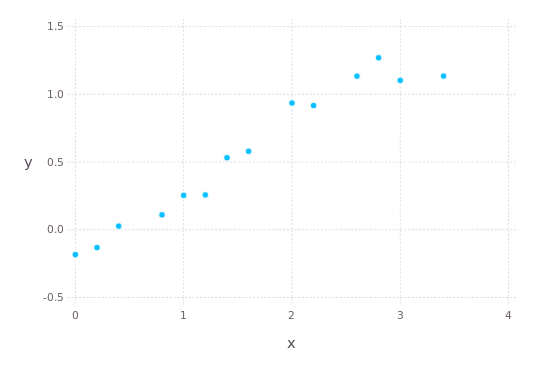

In [32]:
using Gadfly

Gadfly.plot(x=x,y=y)

** Pacote LsqFit **

Se tiver instalado use: Pkg.add("LsqFit")

In [33]:
using LsqFit

# Xm para não ocorrer problema com o "x" dos dados
modelo(Xm, a) = a[1].*Xm + a[2]

# valores iniciais dos coeficientes é o vetor coluna [0.5, 0.5]

ajuste = LsqFit.curve_fit(modelo, x, y, [0.5, 0.5])

#   ajuste.dof: graus de liberdade
#   ajuste.param: coefientes da curva
#   ajuste.resid: vetor de residuos de erro
#   ajuste.jacobian: Jacobiano Estimado

# estimativa de erro dos coeficientes. 0.95 é 95% de confiança:
erros = estimate_errors(ajuste, 0.95);

In [34]:
ap = ajuste.param

modelo_lsqfit(Xm, ap) = ap[1].*Xm+ap[2]

modelo_lsqfit (generic function with 1 method)

In [35]:
# parametros da reta a.x + b ("a" é o primeiro e "b" o segundo)

ap

2-element Array{Float64,1}:
  0.459962
 -0.175732

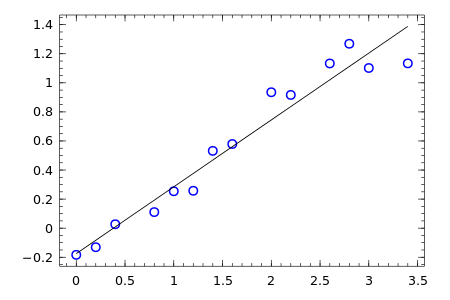

In [36]:
using Winston

Winston.plot(x, y, "ob",x,modelo_lsqfit(x,ap))

O "modelo" reta, é um polinômio na forma de vetor contendo o valor de a = 0.45996 e b= -0.17573

** Pacote CurveFit **

Se tiver instalado use: Pkg.add("CurveFit")

In [148]:
using CurveFit

In [38]:
reta = CurveFit.curve_fit(CurveFit.LinearFit, x, y)

ajuste_curvefit = reta(x) ;

In [39]:
# parametros da reta a.x + b ("a" é o primeiro e "b" o segundo)

reta

CurveFit.LinearFit{Float64}([-0.17573217249621112,0.4599622661497015])

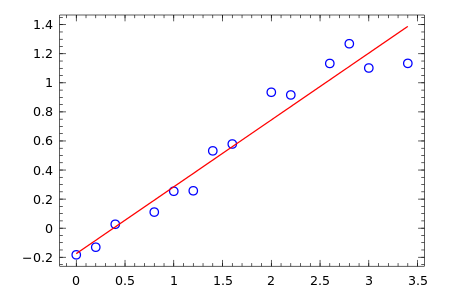

In [40]:
using Winston

Winston.plot(x, y, "ob", x, ajuste_curvefit, "r-", linewidth=3)

** Juntando todos os plots **

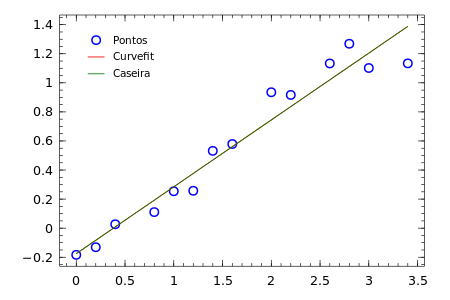

In [41]:
Winston.plot(x, y, "ob", x, ajuste_curvefit, "r-",x,modelo_lsqfit(x,ap),"g-" )
Winston.legend(["Pontos";"Curvefit"; "Caseira";"lsqFit"])


### POLINOMIAL (grau > 1) ###

ATENÇÃO! É importante resetar as variaveis antes de usar os outros modelos de ajuste de curvas, pois as constantes a,b,c são as mesmas em todos os modelos

In [42]:
using DataFrames

In [43]:
tabela_dados_parabola = readtable("dados_parabola.csv")

,x,y
1,0.0,1.03736647643897
2,0.5,4.18970182023376
3,1.0,9.37327499233461
4,1.5,13.5687048342334
5,2.0,15.5096536090038
6,2.5,17.7217021365479
7,3.0,20.6548588248431
8,3.5,21.5216664448986
9,4.0,23.3510698514123
10,4.5,25.3057105638087


In [44]:
# atraibuíndo às variáveis "x" e "y" os valores das colunas da tabela_dados_parabola

x = Array(tabela_dados_parabola[1]); 
y = Array(tabela_dados_parabola[2]);

In [45]:
# DADOS PARA USO DIRETO CASO NÃO TENHA O ARQUIVO ".CSV" . É SO RETIRAR O # PARA USAR. 

# x = [0.0,0.2,0.4,1.0,1.6,1.8,2.0,2.6,2.8,3.0,3.8,4.8,5.0,5.2,6.0,6.2,7.4,7.6,7.8,8.6,8.8,9.0,9.2,9.4,10.0,10.6,10.8,11.2,11.6,11.8,12.2,12.4];
# y = [-0.183440428023042,-0.131101157495126,0.0268875670852843,0.30012,0.579048247883555,0.852605831272159,0.935180993484717,1.13328608090532,1.26893326843583,1.10202945535186,1.09201137189664,1.14279083803453,0.811302535321072,0.909735376251797,0.417067545528244,0.460107770989798,-0.516307074859654,-0.333994077331822,-0.504124744955962,-0.945794320817293,-0.91593455308278,-0.975458595671737,-1.09943707404275,-1.11254211607374,-1.297399805891,-1.23440439602665,-0.953807504156356,-1.12240274852172,-0.609284630192522,-0.59256028675945,-0.402521296049042,-0.510090363150962];

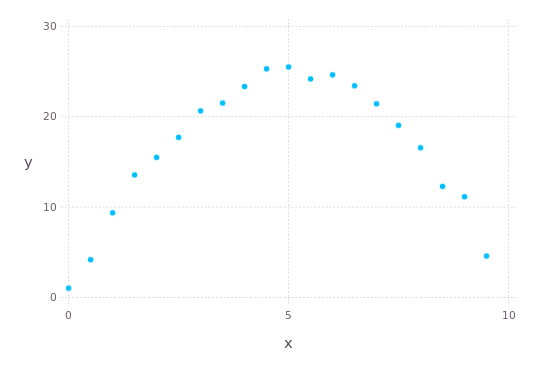

In [46]:
using Gadfly

Gadfly.plot(x=x,y=y)

** Pacote LsqFit **

In [47]:
using LsqFit

# Xm para não ocorrer problema com o "x" dos dados
modelo(Xm, a) = a[1].*Xm.^2 + a[2].*Xm + a[3]

# valores iniciais dos coeficientes é o vetor coluna [-0.5, 0.5, 0.5]

ajuste = LsqFit.curve_fit(modelo, x, y, [0.5, 0.5, 0.5])

#   ajuste.dof: graus de liberdade
#   ajuste.param: coefientes da curva
#   ajuste.resid: vetor de residuos de erro
#   ajuste.jacobian: Jacobiano Estimado

# estimativa de erro dos coeficientes. 0.95 é 95% de confiança:
erros = estimate_errors(ajuste, 0.95);

In [48]:
ap = ajuste.param

# substituindo os valores do vetor "a" na função modelo

modelo_lsqfit(Xm, ap) = ap[1].*Xm.^2 + ap[2].*Xm + ap[3]

modelo_lsqfit (generic function with 1 method)

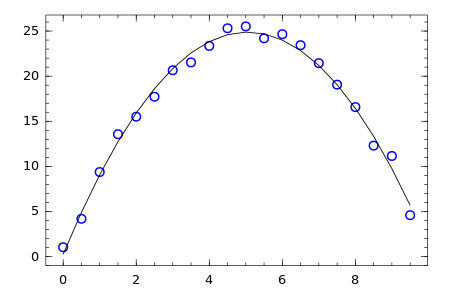

In [49]:
using Winston

#plotando o gráfico: a função modelo receberá os dados do vetor de dados "x" 
# e sustituirá a variável "Xm" pelos valores de "x"

Winston.plot(x, y, "ob", x , modelo_lsqfit(x,ap))

O "modelo polinomial ajustado", é um polinômio na forma de vetor contendo o valor de a = -0.96769 , b= 9.76314 e c = 0.25916

** Pacote CurveFit ** 

In [50]:
using CurveFit

In [51]:
polinomio = CurveFit.curve_fit(CurveFit.Poly, x, y,2)
ajuste_curvefit = polinomio(x) ;

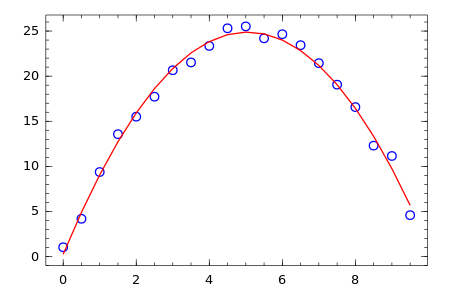

In [52]:
using Winston

Winston.plot(x, y, "ob", x, ajuste_curvefit, "r-", linewidth=3)

** Juntando todos os plots **

O ajuste do pacote curvefit e do pacote lsqfit concordam entre si, enquanto o ajuste do modelo caseira diverge

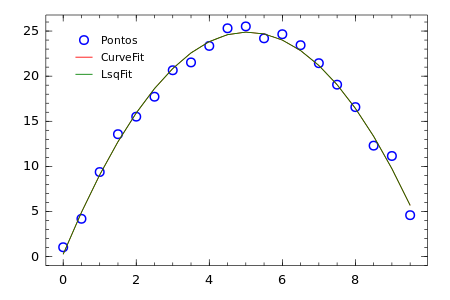

In [53]:
Winston.plot(
x, y, "ob", 
x, ajuste_curvefit , "r-",
x, modelo_lsqfit(x,ap),"g-"
)

Winston.legend(["Pontos"; "CurveFit"; "LsqFit"])

### NÃO POLINOMIAL ###

![](https://www.juliabox.org/files/juliatutorialbr/funcoes-ajustes-curvas.png)

ATENÇÃO! É importante resetar as variaveis antes de usar os outros modelos de ajuste de curvas, pois as constantes a,b,c são as mesmas em todos os modelos

In [54]:
using DataFrames

tabela_dados_senoide = readtable("dados_senoide.csv")

,x,y
1,0.0,-0.183440428023042
2,0.2,-0.131101157495126
3,0.4,0.0268875670852843
4,1.0,0.30012
5,1.6,0.579048247883555
6,1.8,0.852605831272159
7,2.0,0.935180993484717
8,2.6,1.13328608090532
9,2.8,1.26893326843583
10,3.0,1.10202945535186


In [55]:
# atraibuíndo às variáveis "x" e "y" os valores das colunas da tabela_dados_senoide

x = Array(tabela_dados_senoide[1]); 
y = Array(tabela_dados_senoide[2]);

In [56]:
# DADOS PARA USO DIRETO CASO NÃO TENHA O ARQUIVO ".CSV" . É SO RETIRAR O # PARA USAR. 

# x = [0, 0.200000, 0.400000, 1.00000, 1.60000, 1.80000, 2.00000, 2.60000, 2.80000, 3.00000, 3.80000, 4.80000, 5.00000, 5.20000, 6.00000, 6.20000, 7.40000, 7.60000, 7.80000, 8.60000, 8.80000, 9.00000, 9.20000, 9.40000, 10.0000, 10.6000, 10.8000, 11.2000, 11.6000, 11.8000, 12.2000, 12.4000];
# y = [-0.183440428023042, -0.131101157495126, 0.0268875670852843, 0.300120, 0.579048247883555, 0.852605831272159, 0.935180993484717, 1.13328608090532, 1.26893326843583, 1.10202945535186, 1.09201137189664, 1.14279083803453, 0.811302535321072, 0.909735376251797, 0.417067545528244, 0.460107770989798, -0.516307074859654, -0.333994077331822, -0.504124744955962, -0.945794320817293, -0.915934553082780, -0.975458595671737, -1.09943707404275, -1.11254211607374, -1.29739980589100, -1.23440439602665, -0.953807504156356, -1.12240274852172, -0.609284630192522, -0.592560286759450, -0.402521296049042, -0.510090363150962];

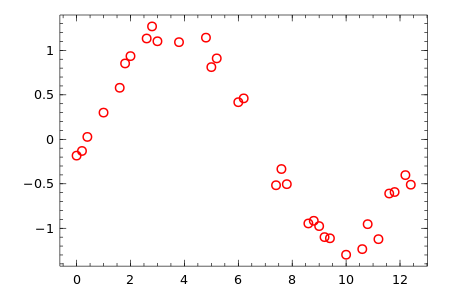

In [57]:
using Winston

Winston.plot(x,y,"or")


** Pacote LsqFit ** 

In [58]:
using LsqFit

# Xm para não ocorrer problema com o "x" dos dados

modelo(Xm, a) = a[1].*sin( a[2].*Xm + a[3] );

# valores iniciais dos coeficientes é o vetor coluna [-0.5, 0.5, 0.5]

ajuste = LsqFit.curve_fit(modelo, x, y, [0.5, 0.5, 0.5])

#   ajuste.dof: graus de liberdade
#   ajuste.param: coefientes da curva
#   ajuste.resid: vetor de residuos de erro
#   ajuste.jacobian: Jacobiano Estimado

# estimativa de erro dos coeficientes. 0.95 é 95% de confiança:

erros = estimate_errors(ajuste, 0.95);

In [59]:
ap = ajuste.param

modelo_lsqfit(Xm, ap) = ap[1].*sin( ap[2].*Xm + ap[3] )

modelo_lsqfit (generic function with 1 method)

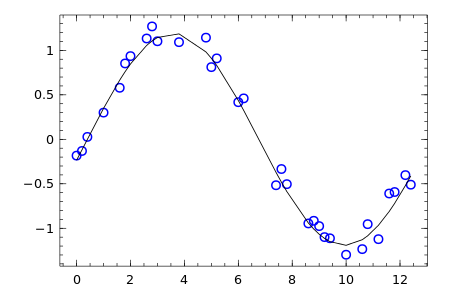

In [60]:
using Winston
Winston.plot(x, y, "ob",x,modelo_lsqfit(x, ap))

** Pacote CurveFit **

In [61]:
using CurveFit

In [62]:
a = [0.5, 0.5, 0.5]
eps = 0.0000000001
maxiter= 200.0

xy = [x y]

modelo(x,a) = x[2]-a[1]*sin(a[2]*x[1] + a[3])

coefs,converged,iter = CurveFit.nonlinear_fit(xy,modelo,a,eps,maxiter);

In [63]:
a = coefs

modelo_curvefit(xy,a) = a[1].*sin(a[2].*x + a[3]);

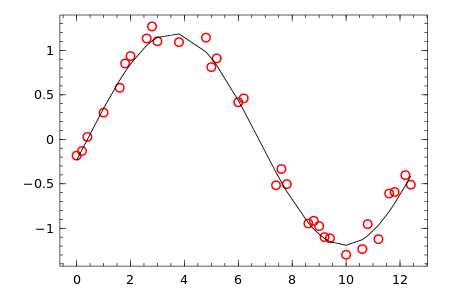

In [64]:
using Winston
Winston.plot(x, y, "or",x,modelo_curvefit(x, a))

** Juntando todos os plots **

O ajuste do pacote curvefit e do pacote lsqfit concordam entre si

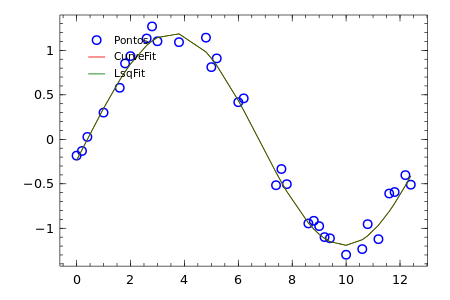

In [65]:
Winston.plot(
x, y, "ob", 
x, modelo_curvefit(x,a), "r-",
x, modelo_lsqfit(x,ap) ,"g-"
)
Winston.legend(["Pontos"; "CurveFit"; "LsqFit"])

In [66]:
using PyPlot

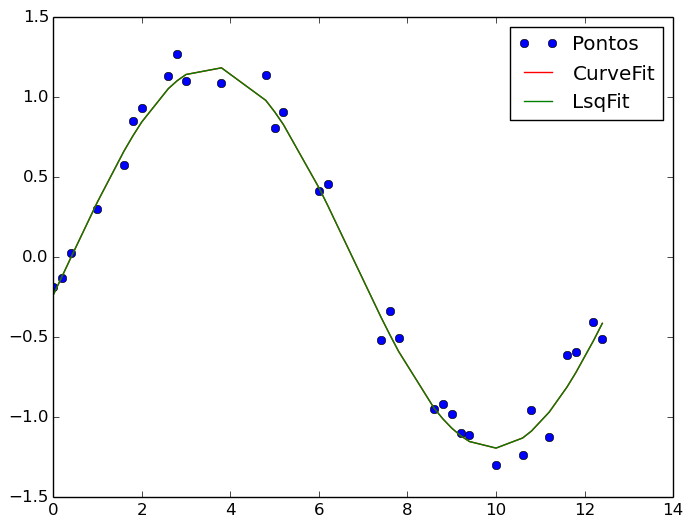

PyObject <matplotlib.legend.Legend object at 0x7f61b5e8dbd0>

In [67]:
PyPlot.plot(
x, y, "ob", 
x, modelo_curvefit(x,a), "r-",
x, modelo_lsqfit(x,ap) ,"g-"
)
PyPlot.legend(["Pontos"; "CurveFit"; "LsqFit"])